In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy import units as u
from astropy import constants as c
import mplhep as hep
%matplotlib inline
hep.style.use("CMS")


query_result = pd.read_csv('gaia_data_3.csv')
query_result

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val,lum_val
0,635799956041107968,139.442714,1.218570,19.391996,1.592682,NaN,NaN,NaN,NaN,19.978771,2.451283,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
1,635582042286653312,139.524460,12.582897,18.497051,16.516786,NaN,NaN,NaN,NaN,20.943810,1.653490,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
2,635559571016034560,137.623021,2.925722,19.176462,2.661200,NaN,NaN,NaN,NaN,20.082441,NaN,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
3,635509955554903808,137.666349,3.230167,18.776514,3.449414,NaN,NaN,NaN,NaN,20.676308,NaN,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
4,635712059535364992,139.943986,1.720993,18.901107,2.217347,NaN,NaN,NaN,NaN,20.492384,1.702980,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744856,612481509145431168,135.060852,3.008682,19.231384,2.746299,NaN,NaN,NaN,NaN,20.797080,1.731337,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
1744857,612257384865929088,134.758385,1.782044,18.225211,0.948088,3.074082,1.328510,-2.852438,-4.257132,20.501303,NaN,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
1744858,612465188268127488,135.148507,0.382653,19.127004,0.358252,1.456596,0.335754,-13.325522,-5.067614,18.696210,2.186352,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN
1744859,612351251376013312,135.101835,1.418118,18.339425,1.326192,-1.201726,1.592959,-7.625232,-8.922254,20.596777,1.204475,NaN,NaN,NOT_AVAILABLE,NaN,NaN,NaN


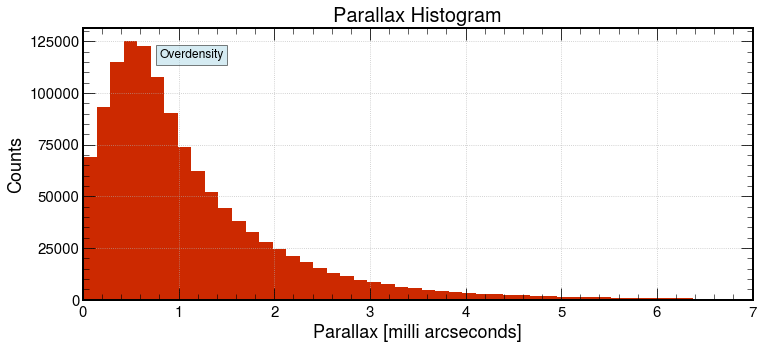

In [2]:
#Filter parallax
query_result_filtered = query_result.dropna(subset=['parallax'])

parallax = query_result_filtered['parallax']

plt.figure(figsize=(12,5))
plt.hist(parallax, bins=2250, color='#cc2900')
plt.xlim(0,7)
plt.xlabel("Parallax [milli arcseconds]", fontsize=18, loc="center")
plt.ylabel("Counts", fontsize=18, loc="center")
plt.title("Parallax Histogram", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(0.8,117000, 'Overdensity', fontsize = 12, bbox = dict(boxstyle = 'square', facecolor = 'lightblue', alpha = 0.5))
plt.grid()
plt.show()

Parallax overdensity range: 0.4 milli arcsec - 0.7 milli arcsec
distance range: 1/0.0004 - 1/0.0007 => 2500pc - 1428.57pc

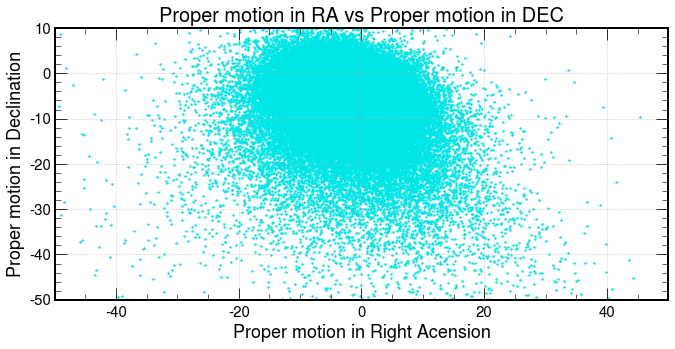

In [3]:
#proper motion in RA vs. proper motion in Dec
import matplotlib.patches as mpatches

pmra = []
pmdec = []
parallax_fl=[]

# for row in parallax.iterrows():
#     if row['parallax'] >= 0.4 and row['parallax'] <= 0.7:
#         parallax_fil.append(row['parallax'])
#         pmra.append(row['pmra'])
#         pmdec.append(row['pmdec'])

for index, row in query_result_filtered.iterrows():
    if row['parallax'] >= 0.4 and row['parallax'] <= 0.7:
        parallax_fl.append(row['parallax'])
        pmra.append(row['pmra'])
        pmdec.append(row['pmdec'])


plt.figure(figsize=(11,5))
plt.xlim(-50,50)
plt.ylim(-50,10)
plt.scatter(pmra, pmdec, color='#00e6e6', s=2)
plt.xlabel("Proper motion in Right Acension", fontsize=18, loc="center")
plt.ylabel("Proper motion in Declination", fontsize=18, loc="center")
plt.title("Proper motion in RA vs Proper motion in DEC", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.show()


    

# attempt 2

In [4]:
#Attempt 2 with a smaller radius - 5deg

query2_result = pd.read_csv('Praesepe_5deg.csv')
query2_result

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val
0,684882876660198016,134.400467,35.378283,20.676729,6.695894,NaN,NaN,NaN,NaN,21.274860,NaN,NaN,NaN,NOT_AVAILABLE,NaN,NaN
1,684914384540448256,134.123102,32.403005,20.750410,20.036178,NaN,NaN,NaN,NaN,21.309381,NaN,NaN,NaN,NOT_AVAILABLE,NaN,NaN
2,684993407643332736,134.735838,2.538184,21.113545,2.088307,NaN,NaN,NaN,NaN,20.716368,1.971603,NaN,NaN,NOT_AVAILABLE,NaN,NaN
3,684934824291494272,134.336743,15.925623,20.809646,8.821218,NaN,NaN,NaN,NaN,21.163424,NaN,NaN,NaN,NOT_AVAILABLE,NaN,NaN
4,684950629770058112,134.520104,3.106769,21.167224,1.926611,NaN,NaN,NaN,NaN,20.808088,1.091116,NaN,NaN,NOT_AVAILABLE,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421639,612481509145431168,135.060852,3.008682,19.231384,2.746299,NaN,NaN,NaN,NaN,20.797080,1.731337,NaN,NaN,NOT_AVAILABLE,NaN,NaN
421640,612257384865929088,134.758385,1.782044,18.225211,0.948088,3.074082,1.328510,-2.852438,-4.257132,20.501303,NaN,NaN,NaN,NOT_AVAILABLE,NaN,NaN
421641,612465188268127488,135.148507,0.382653,19.127004,0.358252,1.456596,0.335754,-13.325522,-5.067614,18.696210,2.186352,NaN,NaN,NOT_AVAILABLE,NaN,NaN
421642,612351251376013312,135.101835,1.418118,18.339425,1.326192,-1.201726,1.592959,-7.625232,-8.922254,20.596777,1.204475,NaN,NaN,NOT_AVAILABLE,NaN,NaN


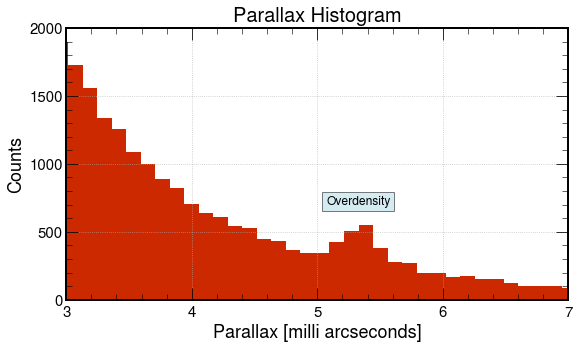

In [5]:
#Filter parallax and plot
query2_result_filtered = query2_result.dropna(subset=['parallax'])

parallax2 = query2_result_filtered['parallax']

plt.figure(figsize=(9,5))
plt.hist(parallax2, bins=2000, color='#cc2900')
plt.xlim(3,7)
plt.ylim(0,2000)
plt.xlabel("Parallax [milli arcseconds]", fontsize=18, loc="center")
plt.ylabel("Counts", fontsize=18, loc="center")
plt.title("Parallax Histogram", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.text(5.07,700, 'Overdensity', fontsize = 12, bbox = dict(boxstyle = 'square', facecolor = 'lightblue', alpha = 0.5))
plt.grid()
plt.show()

Parallax overdensity range: 5.2 milli arcsec - 5.4 milli arcsec distance range: 1/0.0052 - 1/0.0054 => 192.31pc - 185.19pc

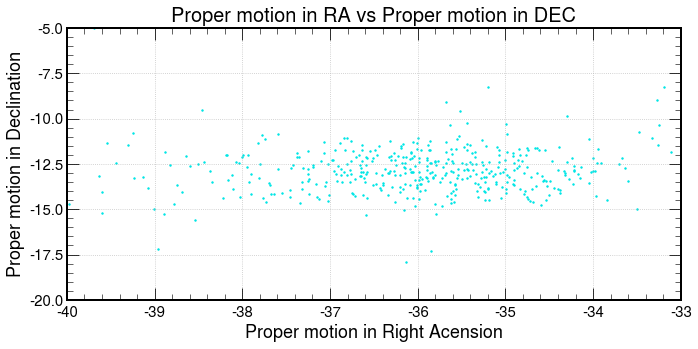

In [6]:
#proper motion in RA vs. proper motion in Dec

pmra_ = []
pmdec_ = []
g_mean_mag = []
bp_rp = []
parallax_=[]


for index, row in query2_result_filtered.iterrows():
    if row['parallax'] >= 5.2 and row['parallax'] <= 5.4:
        parallax_.append(row['parallax'])
        pmra_.append(row['pmra'])
        pmdec_.append(row['pmdec'])
        bp_rp.append(row['bp_rp'])
        g_mean_mag.append(row['phot_g_mean_mag'])


plt.figure(figsize=(11,5))
plt.xlim(-40,-33)
plt.ylim(-20,-5)
plt.scatter(pmra_, pmdec_, color='#00e6e6', s=2)
plt.xlabel("Proper motion in Right Acension", fontsize=18, loc="center")
plt.ylabel("Proper motion in Declination", fontsize=18, loc="center")
plt.title("Proper motion in RA vs Proper motion in DEC", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.axhline(y=-11, color='r', linestyle='-')
plt.grid()
plt.show()

The proper motion of the stars is between -37 and -35 in RA and -11
to -14.5 in DEC. If we were to draw a sort of elipse around it, the center would be at (-36,-12.75), radius1 = 2 
and radius2 = 2.5

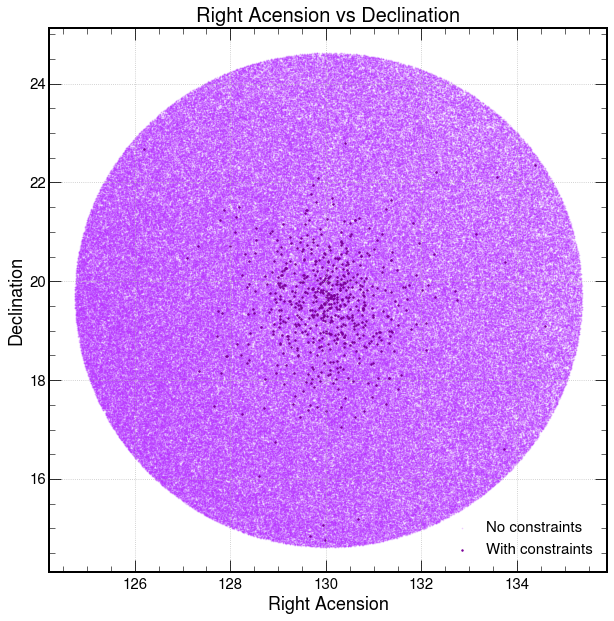

In [7]:
#Plot RA vs DEC from initial query with no constraints
ra = query2_result['ra']
dec = query2_result['dec']

#plt.figure(figsize=(9,5))
# plt.scatter(ra, dec, color='#bb33ff', s=2, alpha=0.2)
# plt.xlim(128,132)
# plt.ylim(10,20)
# plt.xlabel("Right Acension", fontsize=18, loc="center")
# plt.ylabel("Declination", fontsize=18, loc="center")
# plt.title("Right Acension vs Declination", fontsize=20)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
#plt.text(5.07,1600, 'Overdensity', fontsize = 12, bbox = dict(boxstyle = 'square', facecolor = 'lightblue', alpha = 0.5))
#plt.grid()
#plt.show()


#Adding constraints from other parts to above graph

ra_=[]
dec_=[]

for index, row in query2_result_filtered.iterrows():
    if row['pmra'] >= -37 and row['pmra'] <= -35 and row['pmdec'] >= -14.5 and row['pmdec'] <= -11:
        ra_.append(row['ra'])
        dec_.append(row['dec'])

#plt.figure(figsize=(9,5))
plt.scatter(ra, dec, color='#bb33ff', s=0.5, alpha=0.2, label='No constraints')
plt.scatter(ra_, dec_, s=2, color='#7a0099', label='With constraints')
# plt.xlim(128,132)
# plt.ylim(10,20)
plt.xlabel("Right Acension", fontsize=18, loc="center")
plt.ylabel("Declination", fontsize=18, loc="center")
plt.title("Right Acension vs Declination", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.text(5.07,1600, 'Overdensity', fontsize = 12, bbox = dict(boxstyle = 'square', facecolor = 'lightblue', alpha = 0.5))
plt.legend(loc='lower right',prop={'size': 15})
plt.grid()
plt.show()


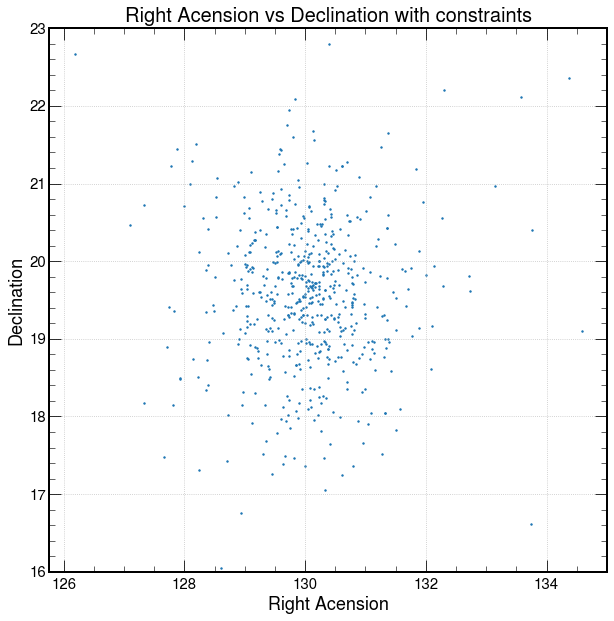

In [8]:
#Adding constraints from other parts to above graph

ra_=[]
dec_=[]



for index, row in query2_result_filtered.iterrows():
    if row['pmra'] >= -37 and row['pmra'] <= -35 and row['pmdec'] >= -14.5 and row['pmdec'] <= -11:
        ra_.append(row['ra'])
        dec_.append(row['dec'])

#plt.figure(figsize=(9,5))
plt.scatter(ra_, dec_, s=2)
# plt.xlim(128,132)
plt.ylim(16,23)
plt.xlabel("Right Acension", fontsize=18, loc="center")
plt.ylabel("Declination", fontsize=18, loc="center")
plt.title("Right Acension vs Declination with constraints", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.text(5.07,1600, 'Overdensity', fontsize = 12, bbox = dict(boxstyle = 'square', facecolor = 'lightblue', alpha = 0.5))
plt.grid()
plt.show()
    
    
    

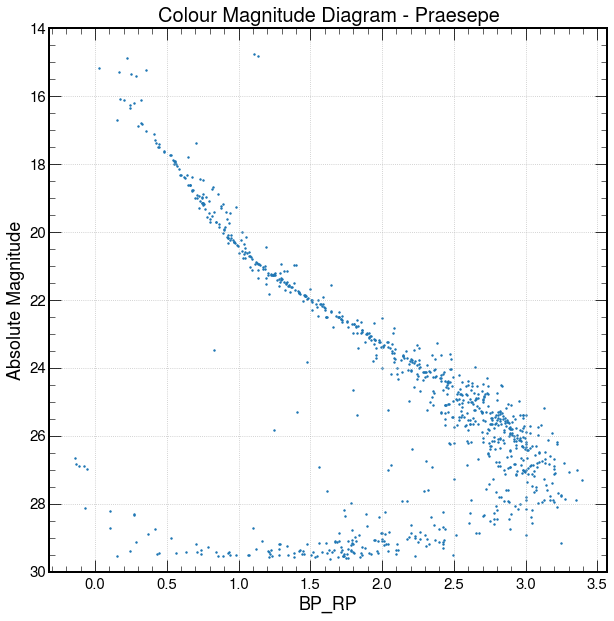

In [36]:
'''
Make a CMD for the cluster using the absolute magnitude in the G band (MG) vs. the BP-RP
color. Plot the y axis inverted so smaller numbers (corresponding to more luminous stars) are at
the top. You should see a really, really nice main sequence of stars!
'''


d = np.array([(1/i) for i in parallax_])
M_G = g_mean_mag - 5*np.log10(d/10)

plt.scatter(bp_rp, M_G, s=2)
# plt.xlim(128,132)
plt.ylim(30,14)
plt.xlabel("BP_RP", fontsize=18, loc="center")
plt.ylabel("Absolute Magnitude", fontsize=18, loc="center")
plt.title("Colour Magnitude Diagram - Praesepe", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.show()



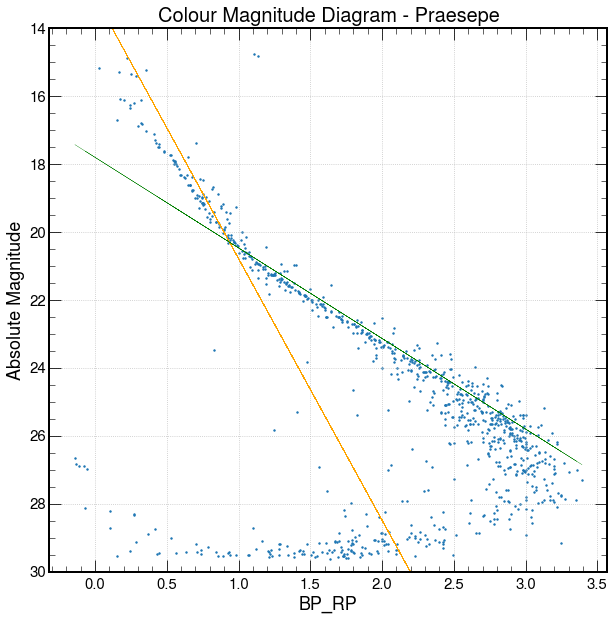

In [45]:
'''
Make a CMD for the cluster using the absolute magnitude in the G band (MG) vs. the BP-RP
color. Plot the y axis inverted so smaller numbers (corresponding to more luminous stars) are at
the top. You should see a really, really nice main sequence of stars!
'''
# from scipy.optimize import curve_fit
# def linear(x,m,b):
#     return -m*x+b

# popt,pcov = curve_fit(linear,[b<=1.0 for b in bp_rp],[m<=20.5 for m in M_G])
# print(popt[0], np.sqrt(pcov[0][0]))
# print(popt[1])

bprp = np.array([bp_rp])
# s=[]
# s_=[]
# for i in bprp:
#     if i<=1:
#         y=8.33*i+11.67
#         s.append(y)
#     else:
#         s_.append(y)

y=7.7*i+13.08
y_=2.666*i+17.80

d = np.array([(1/i) for i in parallax_])
M_G = g_mean_mag - 5*np.log10(d/10)

plt.scatter(bp_rp, M_G, s=2)
plt.plot(bp_rp, y, color='orange', linewidth='0.2')
plt.plot(bp_rp, y_, color='green', linewidth='0.2')
# plt.xlim(128,132)
plt.ylim(30,14)
plt.xlabel("BP_RP", fontsize=18, loc="center")
plt.ylabel("Absolute Magnitude", fontsize=18, loc="center")
plt.title("Colour Magnitude Diagram - Praesepe", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.text(5.07,1600, 'Overdensity', fontsize = 12, bbox = dict(boxstyle = 'square', facecolor = 'lightblue', alpha = 0.5))
plt.grid()
plt.show()

In [50]:
N_MS=[]
N_outliers=[]

for i in range(0, len(M_G)):
    M_G[i] = int(M_G[i])
    if 16<M_G[i]<=28:
        N_MS.append(M_G[i])

print("no. of main sequence stars:", len(N_MS)-96)

# for (i,j) in (bp_rp,M_G):
#     if 

print("no. of outlier (binary) stars:96")

f=(96)/(96+674)
print(r'Binary fraction, f =', f)    
    

no. of main sequence stars: 674
no. of outlier (binary) stars:96
Binary fraction, f = 0.12467532467532468
